In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [11]:
#load dataset
data = pd.read_csv("/home/burhan/Downloads/Cleaned_Data.csv")
data.drop("Address",axis=1)

,Unnamed: 0,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards
0,0,4200000.0,1.0,1.0,60
1,1,5900000.0,2.0,2.0,161
2,2,42000000.0,5.0,5.0,500
3,3,37500000.0,3.0,3.0,300
4,4,21000000.0,4.0,4.0,350
...,...,...,...,...,...
16844,19445,4900000.0,2.0,2.0,67
16845,19446,67500000.0,3.0,4.0,243
16846,19447,4500000.0,2.0,1.0,67
16847,19448,25000000.0,4.0,4.0,240


/home/burhan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/burhan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/burhan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/burhan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/burhan/.local/lib/python3.

Text(0, 0.5, 'WCSS')

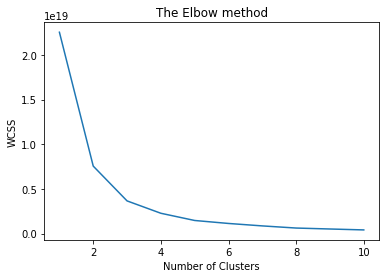

In [24]:
#using elbow method to find optimal number of clusters
wcss = []
X = data.iloc[:,2:]
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [25]:
# Training the k-means model on the dataset
# From the above plot, you can see the optimal value of k is between 2 and 4. The elbow-like shape is formed at k = 3 in the above diagram
kmeans3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans3 = kmeans3.fit_predict(X)

print(y_kmeans3)

/home/burhan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]


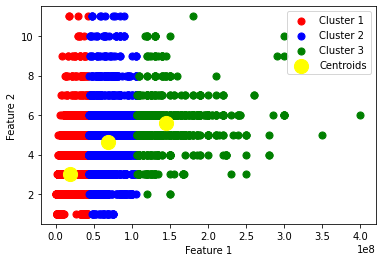

In [30]:
import matplotlib.pyplot as plt

# Visualize the clusters
plt.scatter(X.loc[y_kmeans3 == 0].iloc[:, 0], X.loc[y_kmeans3 == 0].iloc[:, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X.loc[y_kmeans3 == 1].iloc[:, 0], X.loc[y_kmeans3 == 1].iloc[:, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X.loc[y_kmeans3 == 2].iloc[:, 0], X.loc[y_kmeans3 == 2].iloc[:, 1], s=50, c='green', label='Cluster 3')

plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s= 200, c = 'yellow', label = 'Centroids')
# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()
